In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tanmay49/SEM7/main/ML/uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df = df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)

In [7]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
corr = df.corr()

<AxesSubplot:>

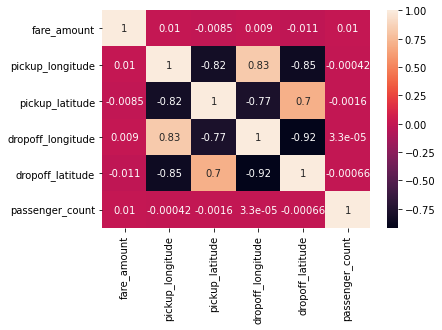

In [14]:
sns.heatmap(corr,annot=True)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

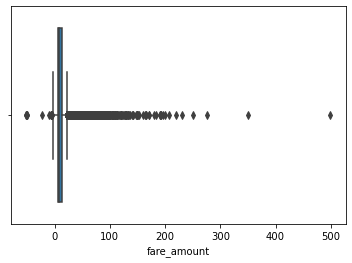

In [17]:
sns.boxplot(df['fare_amount'])

In [18]:
low = df['fare_amount'].quantile(0.05)
high = df['fare_amount'].quantile(.95)
df=df[(df['fare_amount']>low) & (df['fare_amount']<high)]

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

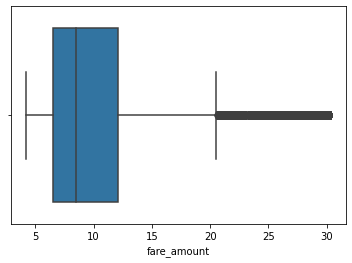

In [19]:
sns.boxplot(df['fare_amount'])

In [20]:
X = df.drop(['fare_amount'],axis=1)
Y = df['fare_amount']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtr,xt,ytr,yt = train_test_split(X,Y)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtr,ytr)

LinearRegression()

In [41]:
yp = model.predict(xt)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# rmse
print(np.sqrt(mean_squared_error(yt,yp))) # here if the fare values are like more than 100 then it's highly acceptable

5.121530809507612


In [52]:
# r2 score close to 1 indicates higher performance
print(r2_score(yt,yp))

-0.0001099747395461037


In [54]:
from sklearn.ensemble import RandomForestRegressor # analyzes the complex relationships, decision tress
model = RandomForestRegressor()
model.fit(xtr,ytr) 

RandomForestRegressor()

In [55]:
yp = model.predict(xt)

In [56]:
# rmse
print(np.sqrt(mean_squared_error(yt,yp))) # here if the fare values are like more than 100 then it's highly acceptable

2.5999646364652373


In [57]:
# r2 score close to 1 indicates higher performance
print(r2_score(yt,yp))

0.7422592657560221
